<a href="https://colab.research.google.com/github/greinaldi/analise_de_dados/blob/main/empresa_vendas_analise_Pandas_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Análise de dados em Pandas e SQL: empresa de vendas com tabelas de pedidos e fornecedores

### Descrição:
O estudo analisa duas bases de dados (pedidos e fornecedores) fornecidas por uma empresa de vendas, utilizando Pandas, NumPy e SQL (SQLite) com o objetivo de extrair informações relevantes para apoio à tomada de decisão. Inicialmente, realizou-se uma análise exploratória em Pandas, abordando estrutura das tabelas, tipos de dados, quantidade de registros, distribuição dos pedidos por status, análise de valores financeiros e identificação de clientes únicos. Em seguida, foram analisados os fornecedores, considerando países de origem, quantidade por país e datas de início das atividades. Por fim, as análises foram reproduzidas em SQL, permitindo a comparação entre as abordagens em Pandas e SQL, e os principais resultados foram visualizados por meio de gráficos desenvolvidos com Matplotlib.


Tópicos:

1.Análise de dados com pandas

1.1. Análise exploratória dos atributos da tabela pedidos em Pandas

1.2. Análise exploratória dos atributos da tabela fornecedores em Pandas

2.Análise de dados em SQL

2.1. Análise de dados em SQL da tabela pedidos

2.2. Análise de dados em SQL da tabela fornecedores

3.Gráficos com Matplotlib

1. Análise de dados com pandas

In [1]:
# Importação das bibliotecas
import pandas as pd
import numpy as np

In [2]:
# Leitura dos arquivos
fornecedores = pd.read_csv('/content/drive/MyDrive/PortifolioPython/tabela+fornecedores.csv')
pedidos = pd.read_csv('/content/drive/MyDrive/PortifolioPython/tabela+pedidos.csv')

1.1.  Análise exploratória dos atributos da tabela pedidos em Pandas

In [3]:
# Informações gerais sobre a tabela pedidos: nome das colunas, tipos de dados e valores não nulos
# A tabela pedidos é composta por 6 atributos e 70 instâncias
pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      70 non-null     int64  
 1   Data_do_Pedido          70 non-null     object 
 2   Status                  70 non-null     object 
 3   Total_do_Pedido         70 non-null     float64
 4   Cliente                 70 non-null     int64  
 5   Data_de_Envio_Estimada  70 non-null     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 3.4+ KB


In [4]:
# Visualização das 4 primeiras linhas da tabela pedidos
pedidos.head(4)

,ID,Data_do_Pedido,Status,Total_do_Pedido,Cliente,Data_de_Envio_Estimada
0,1,2023-08-01,Pendente,150.00,5,2023-08-10
1,2,2023-08-02,Processando,280.50,8,2023-08-15
2,3,2023-08-03,Enviado,450.75,12,2023-08-12
3,4,2023-08-04,Entregue,90.25,2,2023-08-05


In [5]:
# Visualização das 4 últimas linhas da tabela pedidos
pedidos.tail(4)

,ID,Data_do_Pedido,Status,Total_do_Pedido,Cliente,Data_de_Envio_Estimada
66,67,2023-10-07,Processando,420.00,1,2023-10-16
67,68,2023-10-08,Enviado,220.25,7,2023-10-18
68,69,2023-10-09,Pendente,360.75,4,2023-10-17
69,70,2023-10-10,Processando,150.00,3,2023-10-19


In [6]:
# Análise geral dos atributos da tabela pedidos
print(
    f' Análise exploratória dos atributos da tabela pedidos\n\n'
    f' ID -\n Quantidade de valores únicos: {pedidos['ID'].nunique()}\n\n'
    f' Data do Pedido -\n Data inicial: {pedidos['Data_do_Pedido'].min()}; Data final: {pedidos['Data_do_Pedido'].max()}\n\n'
    f' Status -\n Categorias únicas: {pedidos['Status'].unique()}; Quantidade de valores únicos: {pedidos['Status'].nunique()}\n\n'
    f' Total do Pedido -\n Valor mínimo: {pedidos['Total_do_Pedido'].min()}; Valor máximo: {pedidos['Total_do_Pedido'].max()}; Média: {pedidos['Total_do_Pedido'].mean():.2f}\n\n'
    f' Cliente -\n Quantidade de clientes: {pedidos['Cliente'].count()}; Quantidade de valores únicos: {pedidos['Cliente'].nunique()}\n\n'
    f' Data de Envio Estimada -\n Data inicial: {pedidos['Data_de_Envio_Estimada'].min()}; Data final: {pedidos['Data_de_Envio_Estimada'].max()}\n\n'
    )

 Análise exploratória dos atributos da tabela pedidos

 ID -
 Quantidade de valores únicos: 70

 Data do Pedido -
 Data inicial: 2023-08-01; Data final: 2023-10-10

 Status -
 Categorias únicas: ['Pendente' 'Processando' 'Enviado' 'Entregue']; Quantidade de valores únicos: 4

 Total do Pedido -
 Valor mínimo: 75.0; Valor máximo: 750.0; Média: 312.43

 Cliente -
 Quantidade de clientes: 70; Quantidade de valores únicos: 50

 Data de Envio Estimada -
 Data inicial: 2023-08-05; Data final: 2023-10-19




In [7]:
# Qual é a quantidades de registros por categoria do Atributo Status?
print(
    f'Status Pendente - Quantidade: {(pedidos['Status'] == 'Pendente').sum()}\n'
    f'Status Processando - Quantidade: {(pedidos['Status'] == 'Processando').sum()}\n'
    f'Status Enviado - Quantidade: {(pedidos['Status'] == 'Enviado').sum()}\n'
    f'Status Entregue - Quantiade: {(pedidos['Status'] == 'Entregue').sum()}\n'
)

Status Pendente - Quantidade: 18
Status Processando - Quantidade: 22
Status Enviado - Quantidade: 19
Status Entregue - Quantiade: 11



In [8]:
# Quais são os valores mínimos, máximos e a média do total dos pedidos das categorias do Atributo Status?
print(
    f'Status Pendente e Total do Pedido\n'
    f'Total: {pedidos[pedidos['Status'] == 'Pendente']['Total_do_Pedido'].sum()}; '
    f'Mínimo: {pedidos[pedidos['Status'] == 'Pendente']['Total_do_Pedido'].min()}; '
    f'Máximo: {pedidos[pedidos['Status'] == 'Pendente']['Total_do_Pedido'].max()}; '
    f'Média: {pedidos[pedidos['Status'] == 'Pendente']['Total_do_Pedido'].mean():.2f}\n\n'
    f'Status Processando e Total do Pedido\n'
    f'Total: {pedidos[pedidos['Status'] == 'Processando']['Total_do_Pedido'].sum()}; '
    f'Mínimo: {pedidos[pedidos['Status'] == 'Processando']['Total_do_Pedido'].min()}; '
    f'Máximo: {pedidos[pedidos['Status'] == 'Processando']['Total_do_Pedido'].max()}; '
    f'Média: {pedidos[pedidos['Status'] == 'Processando']['Total_do_Pedido'].mean():.2f}\n\n'
    f'Status Enviado e Total do Pedido\n'
    f'Total: {pedidos[pedidos['Status'] == 'Enviado']['Total_do_Pedido'].sum()}; '
    f'Mínimo: {pedidos[pedidos['Status'] == 'Enviado']['Total_do_Pedido'].min()}; '
    f'Máximo: {pedidos[pedidos['Status'] == 'Enviado']['Total_do_Pedido'].max()}; '
    f'Média: {pedidos[pedidos['Status'] == 'Enviado']['Total_do_Pedido'].mean():.2f}\n\n'
    f'Status Entregue e Total do Pedido\n'
    f'Total: {pedidos[pedidos['Status'] == 'Entregue']['Total_do_Pedido'].sum()}; '
    f'Mínimo: {pedidos[pedidos['Status'] == 'Entregue']['Total_do_Pedido'].min()}; '
    f'Máximo: {pedidos[pedidos['Status'] == 'Entregue']['Total_do_Pedido'].max()}; '
    f'Média: {pedidos[pedidos['Status'] == 'Entregue']['Total_do_Pedido'].mean():.2f}\n\n'
)

Status Pendente e Total do Pedido
Total: 4435.75; Mínimo: 75.0; Máximo: 520.0; Média: 246.43

Status Processando e Total do Pedido
Total: 8000.8; Mínimo: 150.0; Máximo: 520.0; Média: 363.67

Status Enviado e Total do Pedido
Total: 7899.75; Mínimo: 75.5; Máximo: 750.0; Média: 415.78

Status Entregue e Total do Pedido
Total: 1534.15; Mínimo: 85.25; Máximo: 420.5; Média: 139.47




In [9]:
# Quais são as datas mínimas e máximas dos pedidos e as datas mínimas e máximas de envio estimada por categoria do Atributo Status?
print(
    f'Status Pendente\n'
    f'Data do Pedido - Data Mínima: {pedidos[pedidos['Status'] == 'Pendente']['Data_do_Pedido'].min()}; Data Máxima: {pedidos[pedidos['Status'] == 'Pendente']['Data_do_Pedido'].max()}\n'
    f'Data de Envio Estimada - Data Mínima: {pedidos[pedidos['Status'] == 'Pendente']['Data_de_Envio_Estimada'].min()}; Data Máxima: {pedidos[pedidos['Status'] == 'Pendente']['Data_de_Envio_Estimada'].max()}\n\n'

    f'Status Processando\n'
    f'Data do Pedido - Data Mínima: {pedidos[pedidos['Status'] == 'Processando']['Data_do_Pedido'].min()}; Data Máxima: {pedidos[pedidos['Status'] == 'Processando']['Data_do_Pedido'].max()}\n'
    f'Data de Envio Estimada - Data Mínima: {pedidos[pedidos['Status'] == 'Processando']['Data_de_Envio_Estimada'].min()}; Data Máxima: {pedidos[pedidos['Status'] == 'Processando']['Data_de_Envio_Estimada'].max()}\n\n'

    f'Status Enviado\n'
    f'Data do Pedido - Data Mínima: {pedidos[pedidos['Status'] == 'Enviado']['Data_do_Pedido'].min()}; Data Máxima: {pedidos[pedidos['Status'] == 'Enviado']['Data_do_Pedido'].max()}\n'
    f'Data de Envio Estimada - Data Mínima: {pedidos[pedidos['Status'] == 'Enviado']['Data_de_Envio_Estimada'].min()}; Data Máxima: {pedidos[pedidos['Status'] == 'Enviado']['Data_de_Envio_Estimada'].max()}\n\n'

    f'Status Entregue\n'
    f'Data do Pedido - Data Mínima: {pedidos[pedidos['Status'] == 'Entregue']['Data_do_Pedido'].min()}; Data Máxima: {pedidos[pedidos['Status'] == 'Entregue']['Data_do_Pedido'].max()}\n'
    f'Data de Envio Estimada - Data Mínima: {pedidos[pedidos['Status'] == 'Entregue']['Data_de_Envio_Estimada'].min()}; Data Máxima: {pedidos[pedidos['Status'] == 'Entregue']['Data_de_Envio_Estimada'].max()}\n\n'
)

Status Pendente
Data do Pedido - Data Mínima: 2023-08-01; Data Máxima: 2023-10-09
Data de Envio Estimada - Data Mínima: 2023-08-07; Data Máxima: 2023-10-17

Status Processando
Data do Pedido - Data Mínima: 2023-08-02; Data Máxima: 2023-10-10
Data de Envio Estimada - Data Mínima: 2023-08-13; Data Máxima: 2023-10-19

Status Enviado
Data do Pedido - Data Mínima: 2023-08-03; Data Máxima: 2023-10-08
Data de Envio Estimada - Data Mínima: 2023-08-11; Data Máxima: 2023-10-18

Status Entregue
Data do Pedido - Data Mínima: 2023-08-04; Data Máxima: 2023-09-17
Data de Envio Estimada - Data Mínima: 2023-08-05; Data Máxima: 2023-09-25




In [10]:
# Quantos clientes únicos por categorias de Status?
print(
    f' Status Pendente\n'
    f' Clientes - Quantidade de valores únicos: {pedidos[pedidos['Status']  == 'Pendente']['Cliente'].nunique()}\n\n'

    f' Status Processando\n'
    f' Clientes - Quantidade de valores únicos: {pedidos[pedidos['Status']  == 'Processando']['Cliente'].nunique()}\n\n'

    f' Status Enviado\n'
    f' Clientes - Quantidade de valores únicos: {pedidos[pedidos['Status']  == 'Enviado']['Cliente'].nunique()}\n\n'

    f' Status Entregue\n'
    f' Clientes - Quantidade de valores únicos: {pedidos[pedidos['Status']  == 'Entregue']['Cliente'].nunique()}\n\n'
)

 Status Pendente
 Clientes - Quantidade de valores únicos: 14

 Status Processando
 Clientes - Quantidade de valores únicos: 18

 Status Enviado
 Clientes - Quantidade de valores únicos: 16

 Status Entregue
 Clientes - Quantidade de valores únicos: 11




In [11]:
# Quantos clientes possuem mais de um pedido registrado?
contagem_clientes = pedidos['Cliente'].value_counts()
maiores_clientes = contagem_clientes[contagem_clientes > 1].count()
print(f'São {maiores_clientes} clientes que possuem mais de 1 pedido')

São 7 clientes que possuem mais de 1 pedido


In [12]:
# Quais são os clientes que possuem mais de um pedido?
registros_clientes_maiores = pd.DataFrame({
    'Quantidade': contagem_clientes[contagem_clientes > 1],
})
registros_clientes_maiores

,Quantidade
Cliente,
1,7
5,4
3,4
2,4
4,4
6,2
7,2


In [13]:
# Quais são os registros dos clientes que possuem mais que 1 pedido?
df_pedidos = pedidos[pedidos['Cliente'].isin([1,5,3,2,4,6,7])]
df_pedidos.sort_values('Cliente')

,ID,Data_do_Pedido,Status,Total_do_Pedido,Cliente,Data_de_Envio_Estimada
50,51,2023-09-20,Processando,420.00,1,2023-09-25
10,11,2023-08-11,Pendente,180.00,1,2023-08-22
55,56,2023-09-25,Processando,320.00,1,2023-09-29
52,53,2023-09-22,Processando,280.50,1,2023-09-27
62,63,2023-10-03,Enviado,180.25,1,2023-10-15
66,67,2023-10-07,Processando,420.00,1,2023-10-16
59,60,2023-09-29,Enviado,110.25,1,2023-10-03
53,54,2023-09-23,Enviado,150.25,2,2023-09-30
65,66,2023-10-06,Enviado,90.50,2,2023-10-13
58,59,2023-09-28,Processando,250.00,2,2023-10-04


In [14]:
# Quais são os valores totais, mínimos, máximos e média do atributo Total dos Pedidos correspondentes ao cliente 1?
print(
    f'Cliente 1 - Total dos Pedidos:\n\n'
    f'Total: {pedidos[pedidos['Cliente'] == 1]['Total_do_Pedido'].sum()}\n\n'
    f'Mínimo: {pedidos[pedidos['Cliente'] == 1]['Total_do_Pedido'].min()}\n\n'
    f'Máximo: {pedidos[pedidos['Cliente'] == 1]['Total_do_Pedido'].max()}\n\n'
    f'Média: {pedidos[pedidos['Cliente'] == 1]['Total_do_Pedido'].mean()}\n\n'

)

Cliente 1 - Total dos Pedidos:

Total: 1911.0

Mínimo: 110.25

Máximo: 420.0

Média: 273.0




In [15]:
# Quais são as porcentagens de valores de Total dos Pedidos que correspondem aos clientes com somente 1 pedido e aos que detém mais de 2 pedidos?
valor_total = pedidos['Total_do_Pedido'].sum()
valor_maior_que_1_pedido = pedidos[pedidos['Cliente'].isin([1,5,3,2,4,6,7])]['Total_do_Pedido'].sum()
valor_apenas_1_pedido = valor_total - valor_maior_que_1_pedido
print(
    f'Valor total de todos os pedidos: {valor_total:.2f}\n\n'
    f'Os clientes com 1 pedido correspondem a {round(valor_maior_que_1_pedido/valor_total, 2) * 100 }% do valor total dos pedidos\n\n'
    f'Os clientes com mais de 1 pedido correspondem a {round(valor_apenas_1_pedido/valor_total, 2) * 100}% do total dos pedidos \n'
)

Valor total de todos os pedidos: 21870.45

Os clientes com 1 pedido correspondem a 31.0% do valor total dos pedidos

Os clientes com mais de 1 pedido correspondem a 69.0% do total dos pedidos 



In [16]:
# Qual a porcentagem de pedidos entre os Status Processando, Pendente, Enviado e Entregue?


1.2. Análise exploratória dos atributos da tabela fornecedores em Pandas

In [17]:
# Informações gerais sobre a tabela fornecedores
# A tabela é composta por 5 atributos e 50 instâncias/registros
fornecedores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      50 non-null     int64 
 1   Nome_do_Fornecedor      50 non-null     object
 2   País_de_Origem          50 non-null     object
 3   Informações_de_Contato  50 non-null     object
 4   Data_de_Início          50 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.1+ KB


In [18]:
# Visualização da tabela fornecedores, primeiras 4 linhas:
fornecedores.head(4)

,ID,Nome_do_Fornecedor,País_de_Origem,Informações_de_Contato,Data_de_Início
0,1,Techtronix,China,email@techtronix.com,2022-01-15
1,2,ElectroTech,Japão,info@electrotech.co.jp,2021-11-20
2,3,GlobalGadgets,EUA,contact@globalgadgets.com,2022-03-05
3,4,InnovateTech,Coreia do Sul,info@innovatetech.kr,2022-02-10


In [19]:
# Visualização da tabela fornecedores, últimas 4 linhas:
fornecedores.tail(4)

,ID,Nome_do_Fornecedor,País_de_Origem,Informações_de_Contato,Data_de_Início
46,47,ExcelTrade,Malawi,support@exceltrade.mw,2022-05-28
47,48,SmartSolutions,Ruanda,info@smartsolutions.rw,2022-04-02
48,49,RapidTech,Uruguai,sales@rapidtech.uy,2021-12-15
49,50,PremiumImports,Bahamas,contact@premiumimports.bs,2022-08-18


In [20]:
# Análise geral dos atributos da tabela fornecedores
print(
    f' Análise exploratória dos atributos da tabela fornecedores\n\n'
    f' ID -\n Quantidade de valores únicos: {fornecedores['ID'].nunique()} \n\n'
    f' Nome do Fornecedor - \n Quantidade de valores únicos: {fornecedores['Nome_do_Fornecedor'].nunique()}\n\n'
    f' País de Origem - \n Quantidade de valores únicos: {fornecedores['País_de_Origem'].nunique()}\n\n'
    f' Data de Início - \n Data mínima: {fornecedores['Data_de_Início'].min()}; Data máxima: {fornecedores['Data_de_Início'].max()} '
)

 Análise exploratória dos atributos da tabela fornecedores

 ID -
 Quantidade de valores únicos: 50 

 Nome do Fornecedor - 
 Quantidade de valores únicos: 50

 País de Origem - 
 Quantidade de valores únicos: 46

 Data de Início - 
 Data mínima: 2021-06-20; Data máxima: 2022-09-20 


In [21]:
# Quais são os nomes dos fornecedores?
nome_fornecedores = fornecedores['Nome_do_Fornecedor'].unique()
nome_fornecedores

array(['Techtronix', 'ElectroTech', 'GlobalGadgets', 'InnovateTech',
       'EuroElectronics', 'AsiaConnect', 'SwiftElectronics', 'TopGizmos',
       'PrimeTech', 'MegaElectronics', 'GalaxyImports', 'PacificTraders',
       'NewWave', 'DigitalEdge', 'SunriseTech', 'NovaInnovation',
       'GoldenGadgets', 'PioneerSupplies', 'OceanTech',
       'EliteElectronics', 'PeakImports', 'SmartTraders', 'VisionaryTech',
       'StarLink', 'CityElectronics', 'NobleInnovations', 'PowerTech',
       'GlobalTrade', 'BravoTech', 'SwiftSolutions', 'TopQuality',
       'SuperiorImports', 'GoldenSupplies', 'GlobalElectro',
       'PacificImports', 'OptimaTech', 'CreativeInnovations',
       'DiamondImports', 'RapidGadgets', 'SmartConnect', 'TradeMasters',
       'GreatDeals', 'DynamicTech', 'InfiniteImports', 'PowerfulSupplies',
       'UniversalGadgets', 'ExcelTrade', 'SmartSolutions', 'RapidTech',
       'PremiumImports'], dtype=object)

In [22]:
# Quais são os nomes dos países dos fornecedores?
nome_paises_origem = fornecedores['País_de_Origem'].unique()
nome_paises_origem

array(['China', 'Japão', 'EUA', ' Coreia do Sul', 'Alemanha', 'Tailândia',
       'Reino Unido', 'Taiwan', 'Índia', 'Brasil', 'Espanha', 'Austrália',
       'Canadá', 'Singapura', 'México', 'África do Sul', 'Itália',
       'Países Baixos', 'Nova Zelândia', 'França', 'Suíça', 'Rússia',
       'Emirados Árabes Unidos', 'Hong Kong', 'Malásia', 'Noruega',
       'Dinamarca', 'Argentina', 'Chile', 'Bélgica', 'Irlanda', 'Israel',
       'Suécia', 'Jamaica', 'Portugal', 'Maldivas', 'Polônia', 'Mônaco',
       'Costa Rica', 'Nigéria', 'Vietnã', 'Turquia', 'Malawi', 'Ruanda',
       'Uruguai', 'Bahamas'], dtype=object)

In [23]:
# Quais sãos os fornecedores que pertencem ao mesmo país de origem?
fornecedores['País_de_Origem'].value_counts().head(4)

,count
País_de_Origem,
China,5
Japão,1
EUA,1
Coreia do Sul,1


In [24]:
china_fornecedores = fornecedores[fornecedores['País_de_Origem'] == 'China']['Nome_do_Fornecedor']
print(f'Os fornecedores que pertencem a China: \n{china_fornecedores}')

Os fornecedores que pertencem a China: 
0           Techtronix
33       GlobalElectro
39        SmartConnect
41          GreatDeals
45    UniversalGadgets
Name: Nome_do_Fornecedor, dtype: object


2. Análise de dados com SQL

In [25]:
# Importação do SQlite3
import sqlite3

In [26]:
# Criação do banco de dados
conexao = sqlite3.connect('banco_dados.db')

In [27]:
# De CSV para SQL
fornecedores.to_sql(
    name='fornecedores',
    con=conexao,
    if_exists="replace",
    index=False
)
pedidos.to_sql(
    name='pedidos',
    con=conexao,
    if_exists="replace",
    index=False
)

70

2.1. Análise de dados em SQL da tabela pedidos

In [28]:
# Informações gerais sobre a tabela pedidos: nome das colunas, tipos de dados e valores não nulos
query_1 = """
PRAGMA table_info(pedidos);
"""
resultado_1 = pd.read_sql(query_1, conexao)
resultado_1

,cid,name,type,notnull,dflt_value,pk
0,0,ID,INTEGER,0,None,0
1,1,Data_do_Pedido,TEXT,0,None,0
2,2,Status,TEXT,0,None,0
3,3,Total_do_Pedido,REAL,0,None,0
4,4,Cliente,INTEGER,0,None,0
5,5,Data_de_Envio_Estimada,TEXT,0,None,0


In [29]:
# Visualização das 4 primeiras linhas da tabela pedidos
query_2 = """
SELECT * FROM pedidos LIMIT 4;
"""
resultado_2 = pd.read_sql(query_2, conexao)
resultado_2

,ID,Data_do_Pedido,Status,Total_do_Pedido,Cliente,Data_de_Envio_Estimada
0,1,2023-08-01,Pendente,150.00,5,2023-08-10
1,2,2023-08-02,Processando,280.50,8,2023-08-15
2,3,2023-08-03,Enviado,450.75,12,2023-08-12
3,4,2023-08-04,Entregue,90.25,2,2023-08-05


In [30]:
# Visualização das 4 últimas linhas da tabela pedidos
query_3 = """
SELECT * FROM pedidos ORDER BY ID DESC LIMIT 4
"""
resultado_3 = pd.read_sql(query_3, conexao)
resultado_3

,ID,Data_do_Pedido,Status,Total_do_Pedido,Cliente,Data_de_Envio_Estimada
0,70,2023-10-10,Processando,150.00,3,2023-10-19
1,69,2023-10-09,Pendente,360.75,4,2023-10-17
2,68,2023-10-08,Enviado,220.25,7,2023-10-18
3,67,2023-10-07,Processando,420.00,1,2023-10-16


In [31]:
# Análise geral dos atributos da tabela pedidos
## ID - Quantidade de valores únicos
resultado_4 = pd.read_sql("SELECT COUNT(DISTINCT ID) FROM pedidos", conexao)
resultado_4

,COUNT(DISTINCT ID)
0,70


In [32]:
## Data do Pedido - Data mínima e data máxima
query_5 = """
SELECT MIN(Data_do_Pedido) As Data_Minima_Pedido,
MAX(Data_do_Pedido) As Data_Maxima_Pedido
FROM pedidos;
"""
resultado_5 = pd.read_sql(query_5, conexao)
resultado_5

,Data_Minima_Pedido,Data_Maxima_Pedido
0,2023-08-01,2023-10-10


In [33]:
## Status - Categorias únicas
query_6 = """
SELECT DISTINCT(Status) AS Categorias FROM pedidos;
"""
resultado_6 = pd.read_sql(query_6, conexao)
resultado_6

,Categorias
0,Pendente
1,Processando
2,Enviado
3,Entregue


In [34]:
## Status - Quantidade de Categorias
query_7 = """
SELECT COUNT(DISTINCT(Status)) AS Quantidade_Categorias FROM pedidos;
"""
resultado_7 = pd.read_sql(query_7, conexao)
resultado_7

,Quantidade_Categorias
0,4


In [35]:
## Total do Pedido - Valores mínimo, máximo e média
query_8 = """
SELECT
MIN(Total_do_Pedido) AS Valor_Minimo,
MAX(Total_do_Pedido) AS Valor_Maximo,
AVG(Total_do_Pedido) AS Media
FROM pedidos;
"""
resultado_8 = pd.read_sql(query_8, conexao)
resultado_8

,Valor_Minimo,Valor_Maximo,Media
0,75.0,750.0,312.435


In [36]:
## Cliente - Quantidade de clientes e quantidade de valores únicos
query_9 = """
SELECT
COUNT(Cliente) AS Quantidade_Clientes,
COUNT(DISTINCT(Cliente)) AS Quantidade_Clientes_Unicos
FROM pedidos;
"""
resultado_9 = pd.read_sql(query_9, conexao)
resultado_9

,Quantidade_Clientes,Quantidade_Clientes_Unicos
0,70,50


In [37]:
## Data de Envio Estimada - Data inicial e data final
query_10 = """
SELECT
MIN(Data_de_Envio_Estimada) AS Data_inicial,
MAX(Data_de_Envio_Estimada) AS Data_final
FROM pedidos;
"""
resultado_10 = pd.read_sql(query_10, conexao)
resultado_10

,Data_inicial,Data_final
0,2023-08-05,2023-10-19


In [38]:
# Qual é a quantidades de registros por categoria do Atributo Status?
query_11 = """
SELECT
Status,
COUNT(*) Quantidade
FROM pedidos
GROUP BY Status
"""
resultado_11 = pd.read_sql(query_11, conexao)
resultado_11

,Status,Quantidade
0,Entregue,11
1,Enviado,19
2,Pendente,18
3,Processando,22


In [39]:
# Quais são os valores mínimos, máximos e a média do total dos pedidos das categorias do Atributo Status?
query_12 = """
SELECT
Status,
MIN(Total_do_Pedido) AS Valor_Minimo,
MAX(Total_do_Pedido) AS Valor_Maximo,
AVG(Total_do_Pedido) AS Media
FROM pedidos
GROUP BY Status;
"""
resultado_12 = pd.read_sql(query_12, conexao)
resultado_12

,Status,Valor_Minimo,Valor_Maximo,Media
0,Entregue,85.25,420.5,139.468182
1,Enviado,75.50,750.0,415.776316
2,Pendente,75.00,520.0,246.430556
3,Processando,150.00,520.0,363.672727


In [40]:
# Quais são as datas mínimas e máximas dos pedidos e as datas mínimas e máximas de envio estimada por categoria do Atributo Status?
query_13 = """
SELECT
Status,
MIN(Data_de_Envio_Estimada) AS Data_Minima,
MAX(Data_de_Envio_Estimada) AS Data_Maxima
FROM pedidos
GROUP BY Status;
"""
resultado_13 = pd.read_sql(query_13, conexao)
resultado_13

,Status,Data_Minima,Data_Maxima
0,Entregue,2023-08-05,2023-09-25
1,Enviado,2023-08-11,2023-10-18
2,Pendente,2023-08-07,2023-10-17
3,Processando,2023-08-13,2023-10-19


In [41]:
# Quantos clientes únicos por categorias de Status?
query_14 = """
SELECT
Status,
COUNT(DISTINCT(Cliente))
FROM pedidos
GROUP BY Status;
"""
resultado_14 = pd.read_sql(query_14, conexao)
resultado_14

,Status,COUNT(DISTINCT(Cliente))
0,Entregue,11
1,Enviado,16
2,Pendente,14
3,Processando,18


In [42]:
# Quantos clientes possuem mais de um pedido registrado?
query_15 = """
SELECT Cliente,
COUNT(*) AS Quantidade_Pedidos
FROM pedidos
GROUP BY Cliente
HAVING COUNT(*) >= 2;
"""
resultado_15 = pd.read_sql(query_15, conexao)
resultado_15

,Cliente,Quantidade_Pedidos
0,1,7
1,2,4
2,3,4
3,4,4
4,5,4
5,6,2
6,7,2


In [43]:
# Quais são os registros dos clientes que possuem mais que 1 pedido?
query_16 = """
SELECT * FROM pedidos WHERE Cliente IN(1,2,3,4,5,6,7) ORDER BY Cliente;
"""
resultado_16 = pd.read_sql(query_16, conexao)
resultado_16

,ID,Data_do_Pedido,Status,Total_do_Pedido,Cliente,Data_de_Envio_Estimada
0,11,2023-08-11,Pendente,180.00,1,2023-08-22
1,51,2023-09-20,Processando,420.00,1,2023-09-25
2,53,2023-09-22,Processando,280.50,1,2023-09-27
3,56,2023-09-25,Processando,320.00,1,2023-09-29
4,60,2023-09-29,Enviado,110.25,1,2023-10-03
5,63,2023-10-03,Enviado,180.25,1,2023-10-15
6,67,2023-10-07,Processando,420.00,1,2023-10-16
7,4,2023-08-04,Entregue,90.25,2,2023-08-05
8,54,2023-09-23,Enviado,150.25,2,2023-09-30
9,59,2023-09-28,Processando,250.00,2,2023-10-04


In [44]:
# Quais são os valores totais, mínimos, máximos e média do atributo Total dos Pedidos correspondentes ao cliente 1?
query_17 = """
SELECT
SUM(Total_do_Pedido) AS Total,
MIN(Total_do_Pedido) AS Mínimo,
MAX(Total_do_Pedido) AS Máximo,
AVG(Total_do_Pedido) AS Média
FROM pedidos
WHERE Cliente = 1;
"""
resposta_17 = pd.read_sql(query_17, conexao)
resposta_17

,Total,Mínimo,Máximo,Média
0,1911.0,110.25,420.0,273.0


In [45]:
# Quais são as porcentagens de valores de Total dos Pedidos que correspondem aos clientes com somente 1 pedido e aos que detém mais de 2 pedidos?
query_18 = """
WITH pedidos_por_cliente AS (
    SELECT
        Cliente,
        COUNT(*) AS qtd_pedidos,
        SUM(Total_do_Pedido) AS total_cliente
    FROM pedidos
    GROUP BY Cliente
),
total_geral AS (
    SELECT SUM(Total_do_Pedido) AS total_pedidos
    FROM pedidos
)
SELECT
    CASE
        WHEN qtd_pedidos = 1 THEN 'Clientes com 1 pedido'
        WHEN qtd_pedidos > 2 THEN 'Clientes com mais de 2 pedidos'
    END AS categoria_cliente,

    SUM(total_cliente) AS total_categoria,

    ROUND(
        (SUM(total_cliente) * 100.0) / (SELECT total_pedidos FROM total_geral),
        2
    ) AS porcentagem
FROM pedidos_por_cliente
WHERE qtd_pedidos = 1
   OR qtd_pedidos > 2
GROUP BY
    CASE
        WHEN qtd_pedidos = 1 THEN 'Clientes com 1 pedido'
        WHEN qtd_pedidos > 2 THEN 'Clientes com mais de 2 pedidos'
    END;
"""
resposta_18 = pd.read_sql(query_18, conexao)
resposta_18

,categoria_cliente,total_categoria,porcentagem
0,Clientes com 1 pedido,15077.70,68.94
1,Clientes com mais de 2 pedidos,5752.25,26.30


2.2. Análise de dados em SQL da tabela fornecedores

In [46]:
# Informações gerais sobre a tabela fornecedores
query_19 = """
PRAGMA table_info(fornecedores)
"""
resposta_19 = pd.read_sql(query_19, conexao)
resposta_19

,cid,name,type,notnull,dflt_value,pk
0,0,ID,INTEGER,0,None,0
1,1,Nome_do_Fornecedor,TEXT,0,None,0
2,2,País_de_Origem,TEXT,0,None,0
3,3,Informações_de_Contato,TEXT,0,None,0
4,4,Data_de_Início,TEXT,0,None,0


In [47]:
# Visualização da tabela fornecedores, primeiras 4 linhas:
query_20 = """
SELECT * FROM fornecedores ORDER BY ID ASC LIMIT 4;
"""
resposta_20 = pd.read_sql(query_20, conexao)
resposta_20

,ID,Nome_do_Fornecedor,País_de_Origem,Informações_de_Contato,Data_de_Início
0,1,Techtronix,China,email@techtronix.com,2022-01-15
1,2,ElectroTech,Japão,info@electrotech.co.jp,2021-11-20
2,3,GlobalGadgets,EUA,contact@globalgadgets.com,2022-03-05
3,4,InnovateTech,Coreia do Sul,info@innovatetech.kr,2022-02-10


In [48]:
# Visualização da tabela fornecedores, últimas 4 linhas:
query_21 = """
SELECT * FROM fornecedores ORDER BY ID DESC LIMIT 4;
"""
resposta_21 = pd.read_sql(query_21, conexao)
resposta_21

,ID,Nome_do_Fornecedor,País_de_Origem,Informações_de_Contato,Data_de_Início
0,50,PremiumImports,Bahamas,contact@premiumimports.bs,2022-08-18
1,49,RapidTech,Uruguai,sales@rapidtech.uy,2021-12-15
2,48,SmartSolutions,Ruanda,info@smartsolutions.rw,2022-04-02
3,47,ExcelTrade,Malawi,support@exceltrade.mw,2022-05-28


In [49]:
# Análise geral dos atributos da tabela fornecedores
## Fornecedores - Quantidade de registros únicos
query_22 = """
SELECT COUNT(DISTINCT(Nome_do_Fornecedor)) AS Quantidade_Fornecedores FROM fornecedores
"""
resposta_22 = pd.read_sql(query_22, conexao)
resposta_22

,Quantidade_Fornecedores
0,50


In [50]:
## Nomes do Fornecedores
query_23 = """
SELECT DISTINCT(Nome_do_Fornecedor) AS Nomes_Fornecedores FROM fornecedores
"""
resposta_23 = pd.read_sql(query_23, conexao)
resposta_23

,Nomes_Fornecedores
0,Techtronix
1,ElectroTech
2,GlobalGadgets
3,InnovateTech
4,EuroElectronics
5,AsiaConnect
6,SwiftElectronics
7,TopGizmos
8,PrimeTech
9,MegaElectronics


In [51]:
## País de Origem - Quantidade de registros únicos
query_24 = """
SELECT COUNT(DISTINCT(País_de_Origem)) FROM fornecedores
"""
resposta_24 = pd.read_sql(query_24, conexao)
resposta_24

,COUNT(DISTINCT(País_de_Origem))
0,46


In [52]:
## País de Origem - Nome dos países
query_25 = """
SELECT DISTINCT(País_de_Origem) FROM fornecedores
"""
resposta_25 = pd.read_sql(query_25, conexao)
resposta_25

,País_de_Origem
0,China
1,Japão
2,EUA
3,Coreia do Sul
4,Alemanha
5,Tailândia
6,Reino Unido
7,Taiwan
8,Índia
9,Brasil


In [53]:
## Data de ínicio - datas mínimas e máximas
query_26 = """
SELECT
MIN(Data_de_Início) AS Data_Mínima,
MAX(Data_de_Início) AS Data_Maxima
FROM fornecedores;
"""
resposta_26 = pd.read_sql(query_26, conexao)
resposta_26

,Data_Mínima,Data_Maxima
0,2021-06-20,2022-09-20


In [54]:
# Quais sãos os fornecedores que pertencem ao mesmo país de origem?
query_27 = """
SELECT
    País_de_Origem,
    COUNT(*) AS quantidade_fornecedores
FROM fornecedores
GROUP BY País_de_Origem
HAVING COUNT(*) >= 2;
"""
resposta_27 = pd.read_sql(query_27, conexao)
resposta_27

,País_de_Origem,quantidade_fornecedores
0,China,5


In [55]:
query_28 = """
SELECT
Nome_do_Fornecedor,
País_de_Origem
FROM fornecedores
WHERE País_de_Origem LIKE "China";
"""
resposta_28 = pd.read_sql(query_28, conexao)
resposta_28

,Nome_do_Fornecedor,País_de_Origem
0,Techtronix,China
1,GlobalElectro,China
2,SmartConnect,China
3,GreatDeals,China
4,UniversalGadgets,China


3. Gráficos com Matplotlib

In [56]:
# Importação da biblioteca Pyplot
import matplotlib.pyplot as plt

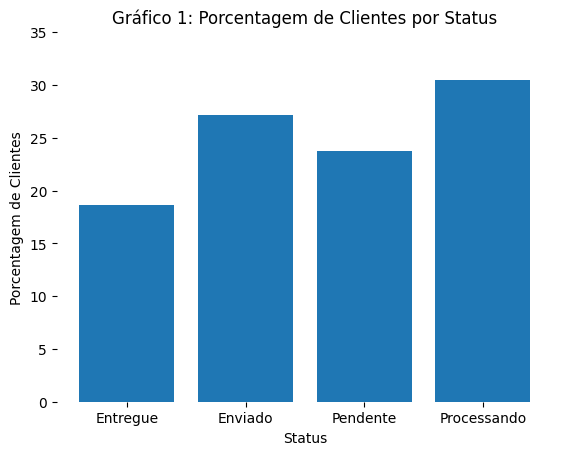

In [70]:
# Gráfico 1: Porcentagem de Clientes por Status
contagem_clientes = pedidos.groupby('Status')['Cliente'].nunique()
total_clientes = contagem_clientes.sum()
porc_clientes = (contagem_clientes / total_clientes) * 100
plt.title('Gráfico 1: Porcentagem de Clientes por Status')
plt.bar(x=contagem_clientes.index,
        height=porc_clientes.values)
plt.xlabel('Status')
plt.yticks(range(0, 40, 5))
plt.ylabel('Porcentagem de Clientes')
plt.box(False)
plt.show()

In [69]:
# Porcentagem de clientes por Status
porc_clientes

,Cliente
Status,
Entregue,18.644068
Enviado,27.118644
Pendente,23.728814
Processando,30.508475


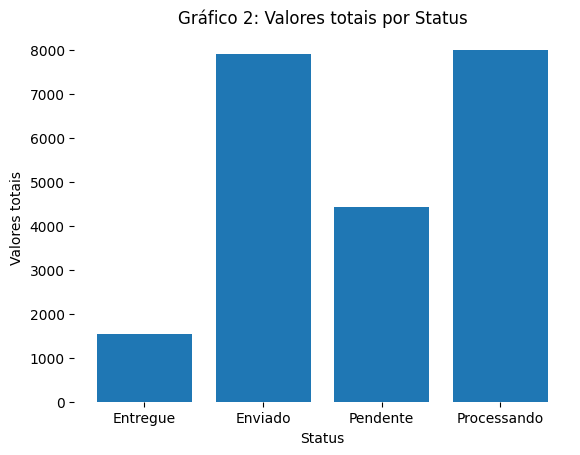

In [59]:
# Gráfico 2: Valores totais por Status
valores_Status = pedidos.groupby('Status')['Total_do_Pedido'].sum()
plt.title('Gráfico 2: Valores totais por Status')
plt.bar(x=valores_Status.index,
        height=valores_Status.values)
plt.xlabel('Status')
plt.ylabel('Valores totais')
plt.box(False)
plt.show()

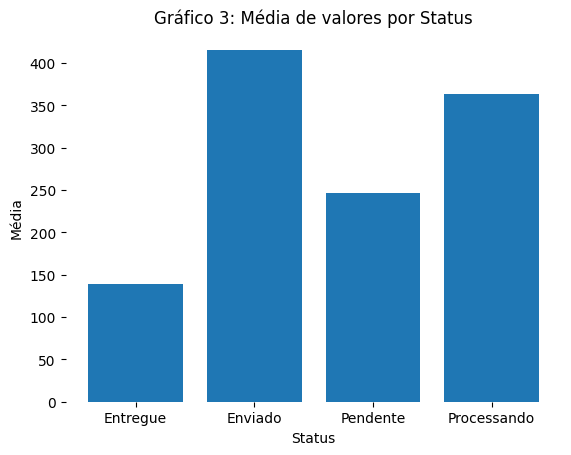

In [60]:
# Gráfico 3: Média de valores por Status
media_valores_Status = pedidos.groupby('Status')['Total_do_Pedido'].mean()
plt.title('Gráfico 3: Média de valores por Status')
plt.bar(x=media_valores_Status.index,
        height=media_valores_Status.values)
plt.xlabel('Status')
plt.ylabel('Média')
plt.box(False)
plt.show()